In [1]:
!pip install xgboost==1.7.6
!pip install imblearn
!pip install scikit-learn==1.3.2

  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Loading & Initial Cleaning
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# **Preprocessing Data**

In [4]:
# Load the dataset with column names
data = pd.read_csv(url, names=columns, header=None) # Added names and header arguments

# Display the first few rows
print(data.head())

# Get summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Explore target variable distribution
print(data['income'].value_counts())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

# **EDA**

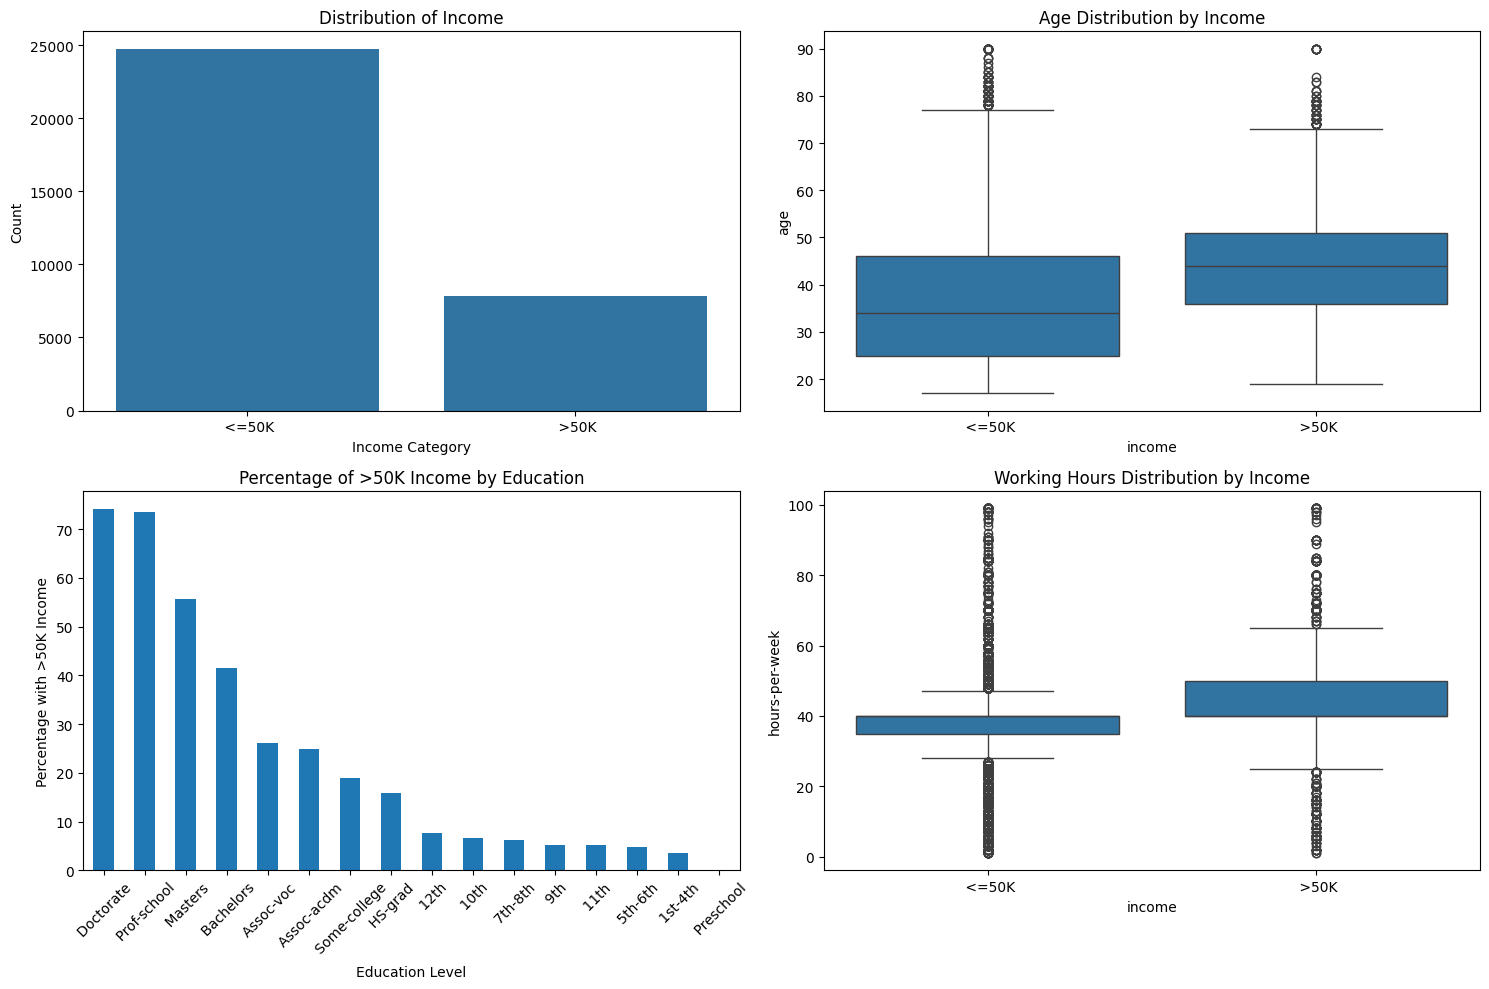

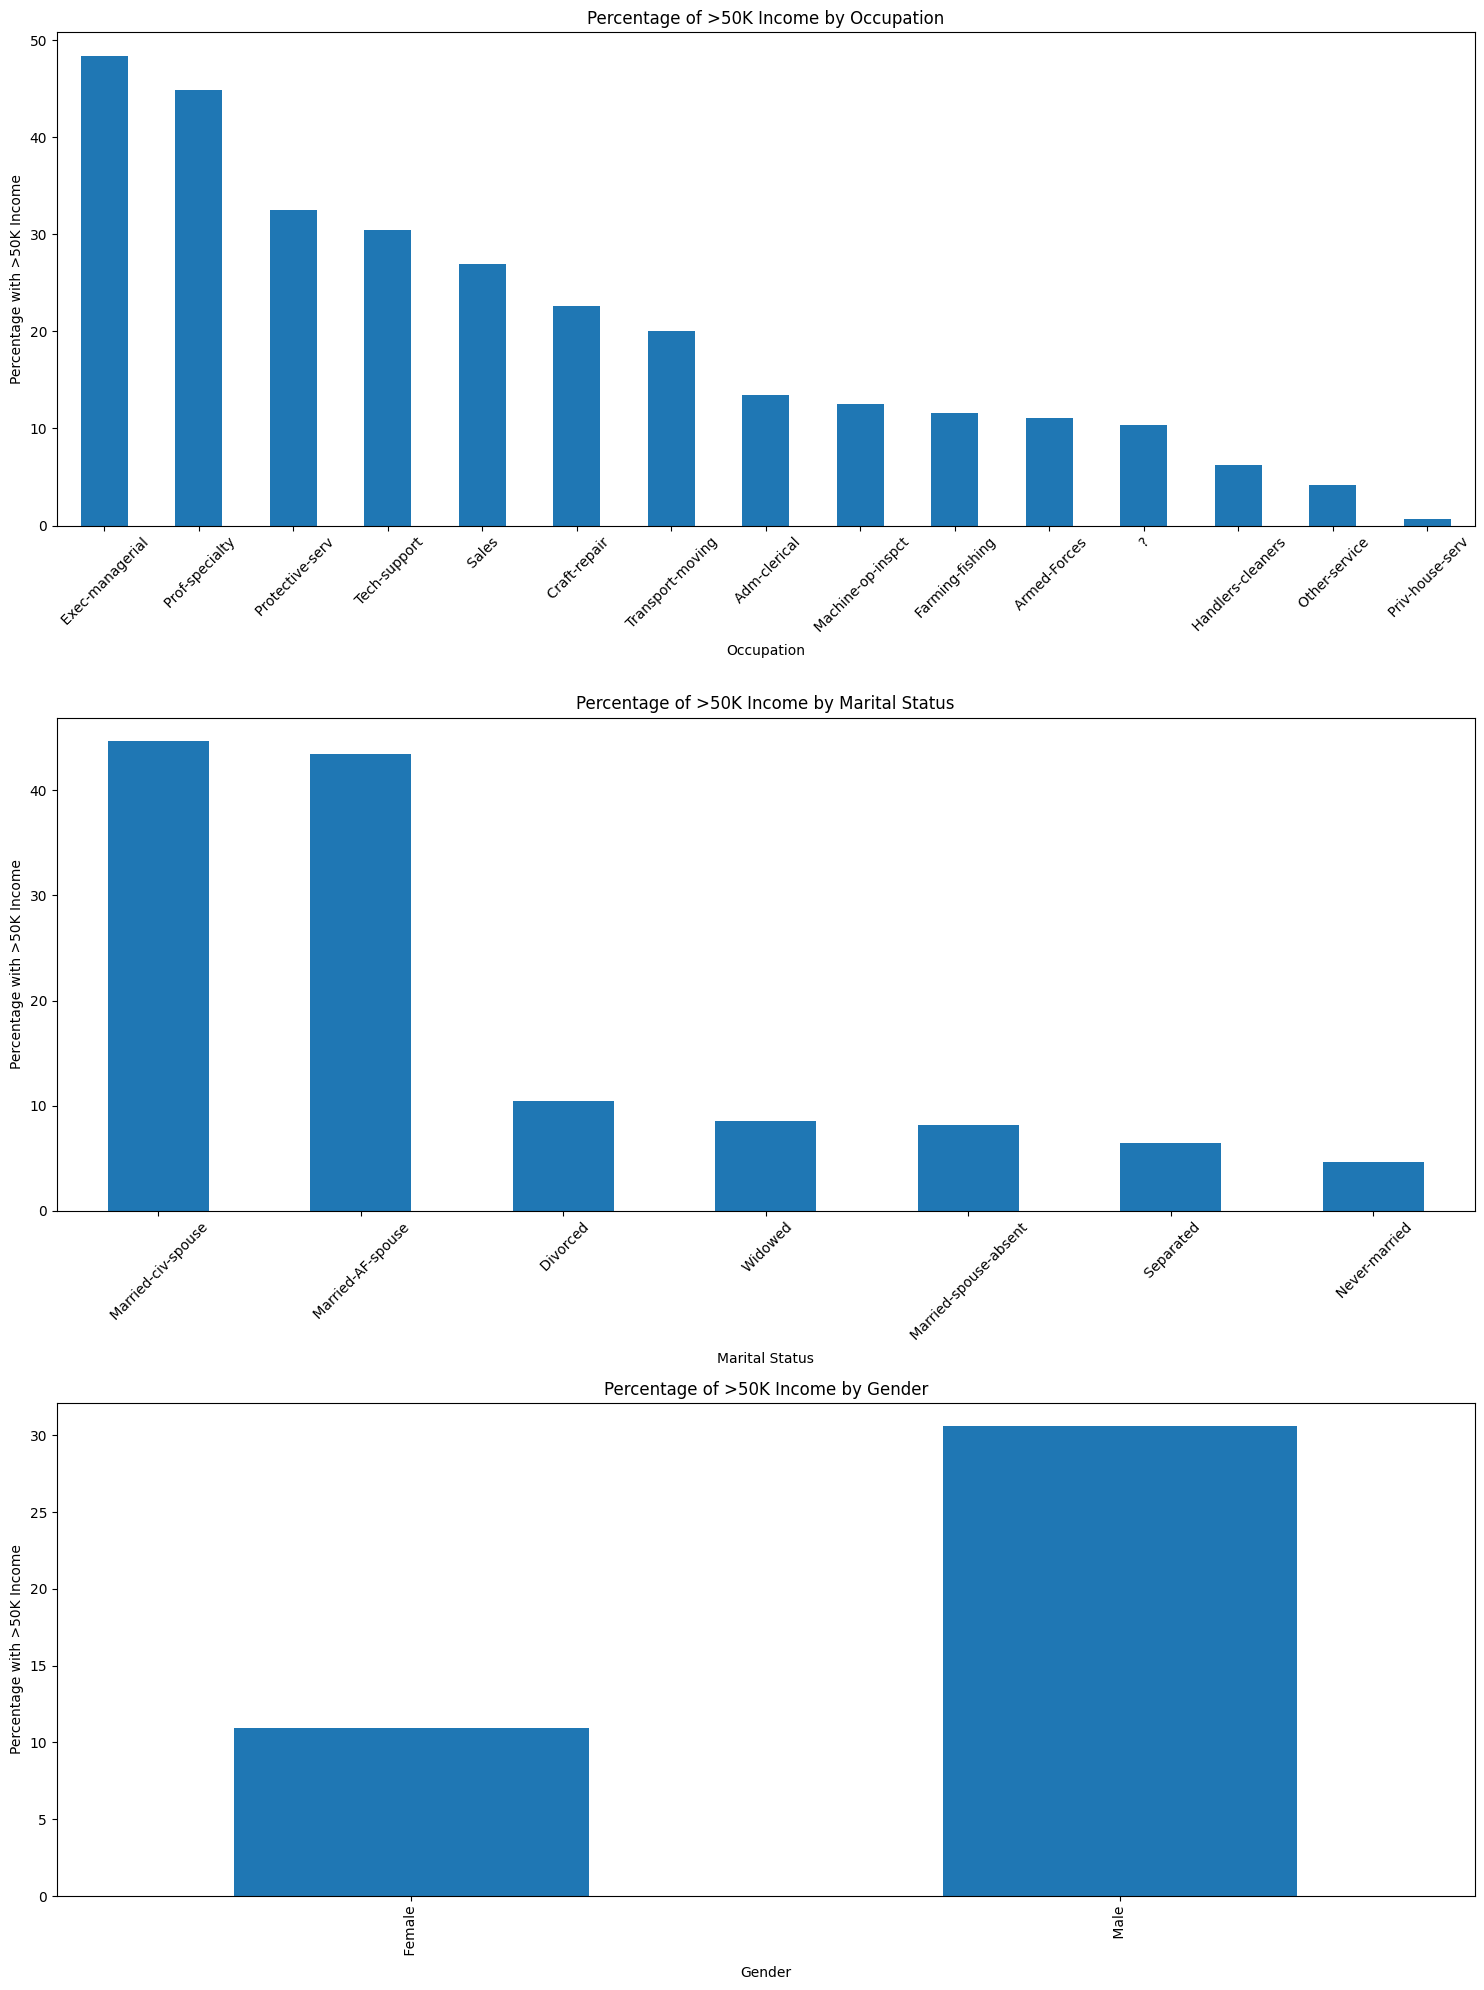

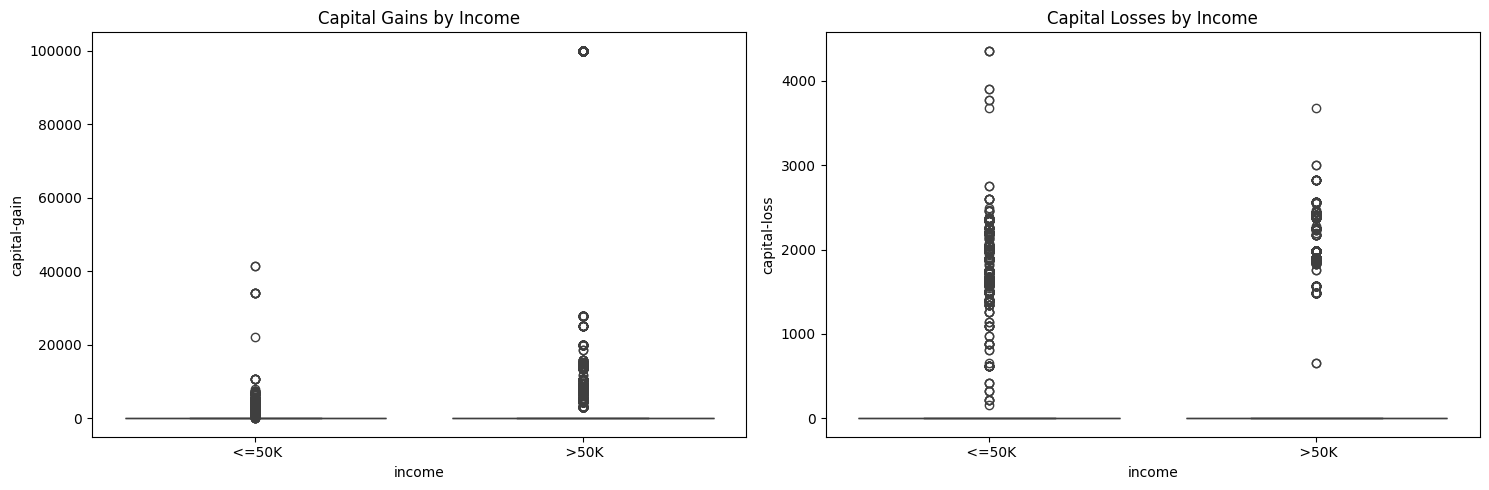

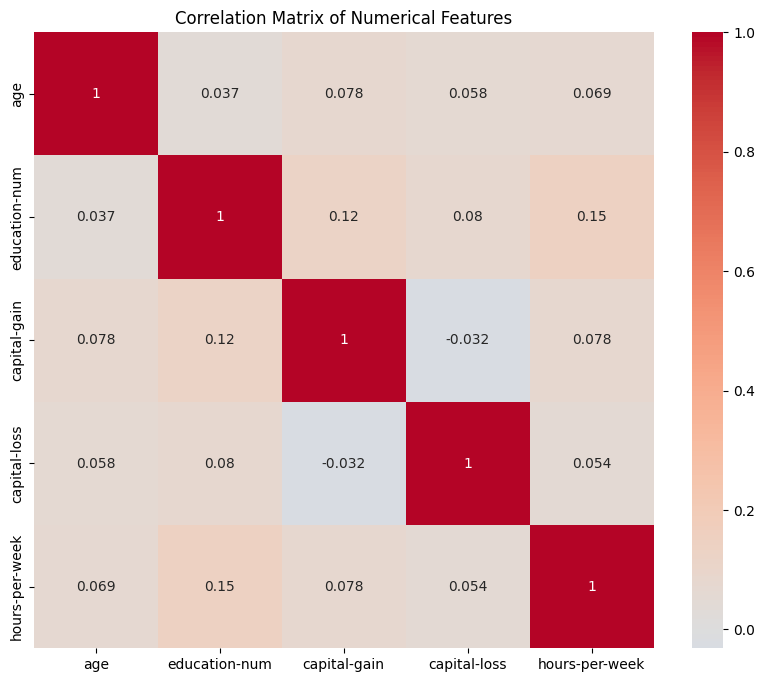


Summary Statistics by Income Category:
            age                                                      \
          count       mean        std   min   25%   50%   75%   max   
income                                                                
<=50K   24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0   
>50K     7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0   

       education-num             ... capital-loss         hours-per-week  \
               count       mean  ...          75%     max          count   
income                           ...                                       
<=50K        24720.0   9.595065  ...          0.0  4356.0        24720.0   
>50K          7841.0  11.611657  ...          0.0  3683.0         7841.0   

                                                           
             mean        std  min   25%   50%   75%   max  
income                                                     
<=50K   38.840210  12.318995  1.0  35.0  40

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure size for all plots
plt.figure(figsize=(15, 10))

# 1. Income Distribution (Target Variable)
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='income')
plt.title('Distribution of Income')
plt.xlabel('Income Category')
plt.ylabel('Count')

# 2. Age vs Income
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='income', y='age')
plt.title('Age Distribution by Income')

# 3. Education vs Income
plt.subplot(2, 2, 3)
income_by_education = pd.crosstab(data['education'], data['income'], normalize='index') * 100
income_by_education.loc[:, income_by_education.columns.str.contains('>50K')].iloc[:, 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of >50K Income by Education')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Percentage with >50K Income')

# 4. Hours per Week vs Income
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='income', y='hours-per-week')
plt.title('Working Hours Distribution by Income')

plt.tight_layout()
plt.show()

# New figure for categorical variables
plt.figure(figsize=(15, 20))

# 5. Income distribution by occupation
plt.subplot(3, 1, 1)
income_by_occupation = pd.crosstab(data['occupation'], data['income'], normalize='index') * 100
income_by_occupation[' >50K'].sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of >50K Income by Occupation')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Percentage with >50K Income')

# 6. Income distribution by marital status
plt.subplot(3, 1, 2)
income_by_marital = pd.crosstab(data['marital-status'], data['income'], normalize='index') * 100
income_by_marital[' >50K'].sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of >50K Income by Marital Status')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Percentage with >50K Income')

# 7. Income distribution by sex
plt.subplot(3, 1, 3)
income_by_sex = pd.crosstab(data['sex'], data['income'], normalize='index') * 100
income_by_sex[' >50K'].plot(kind='bar')
plt.title('Percentage of >50K Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage with >50K Income')

plt.tight_layout()
plt.show()

# Additional Analysis
# 8. Capital gains/losses analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='income', y='capital-gain')
plt.title('Capital Gains by Income')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='income', y='capital-loss')
plt.title('Capital Losses by Income')

plt.tight_layout()
plt.show()

# 9. Correlation matrix for numerical variables
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Print summary statistics
print("\nSummary Statistics by Income Category:")
print(data.groupby('income')[numerical_cols].describe())

# Print percentage of >50K income by workclass
print("\nPercentage of >50K Income by Workclass:")
income_by_workclass = pd.crosstab(data['workclass'], data['income'], normalize='index') * 100
print(income_by_workclass[' >50K'].sort_values(ascending=False))

1. Income Distribution


*   Purpose: To understand the distribution of the target variable ("income").
*   Finding: The dataset is imbalanced, with a significantly higher number of individuals earning "<=50K" compared to " >50K." This imbalance needs to be addressed during model training.
2. Age vs Income


*   Purpose: To explore the relationship between age and income.
*   Finding: Individuals earning " >50K" tend to be slightly older, but the age distribution overlaps significantly between the two income groups. Age alone cannot be a strong predictor of income.
3. Education vs Income


*   Purpose: To understand the impact of education on income.
*   Finding: Higher levels of education are strongly associated with a higher likelihood of earning " >50K." Education plays a crucial role in determining income potential.
4. Hours per Week vs Income


*   Purpose: To investigate the relationship between working hours and income.
*   Finding: Individuals earning " >50K" tend to work longer hours. However, the relationship is not straightforward and there's significant overlap between the groups. Working hours alone cannot fully explain income differences.
5. Income Distribution by Occupation


*   Purpose: To explore the impact of occupation on income.
*   Finding: Certain occupations like "Exec-managerial", "Prof-specialty", and "Tech-support" have a much higher percentage of individuals earning " >50K." This highlights the importance of occupational choice for income potential.
6. Income Distribution by Marital Status


*   Purpose: To investigate the relationship between marital status and income.
*   Finding: "Married-civ-spouse" individuals have a significantly higher chance of earning " >50K." This suggests that marital status can influence income levels.
7. Income Distribution by Gender


*   Purpose: To analyze gender disparities in income.
*   Finding: Males have a significantly higher percentage of earning " >50K" compared to females, indicating a gender gap in income.
8. Capital Gains by Income


*   Purpose: To examine the relationship between capital gains and income.
*   Finding: Individuals earning " >50K" tend to have significantly higher capital gains, suggesting that investment income plays a role in higher earnings.
9. Capital Losses by Income


*   Purpose: To investigate the relationship between capital losses and income.
*   Finding: Individuals earning " >50K" also tend to have higher capital losses, possibly due to higher investment activities and risk-taking.
10. Correlation Matrix


*   Purpose: To assess the relationships between numerical variables.
*   Finding: The correlation matrix revealed weak to moderate correlations between numerical features. Age and education, and education and hours worked showed some positive correlation.
11. Summary Statistics


*   Purpose: To provide numerical summaries of key variables for each income group.
*   Finding: This output confirmed several observations from the visualizations, such as higher mean age and education levels for individuals earning " >50K."

Overall:


*   The analysis highlights the importance of education, occupation, marital status, gender, and financial factors in determining income levels.


























# **Feature Engineering**

In [6]:
# Data Cleaning (Handle missing values)
data['workclass'] = data['workclass'].replace(' ?', 'Unknown')
data['occupation'] = data['occupation'].replace(' ?', 'Unknown')
data['native-country'] = data['native-country'].replace(' ?', 'Unknown')

In [7]:
# Separate features and target variable
X = data.drop('income', axis=1)
y = data['income']

In [8]:
# Encode target variable
y = y.map({' <=50K': 0, ' >50K': 1})


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Define numerical and categorical features
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [11]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# **Handling Class Imbalance**

In [12]:
# Custom SMOTE transformer for pipeline
class SMOTETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.smote = SMOTE(random_state=self.random_state)

    def fit(self, X, y=None):
        # Fit the SMOTE object to the data
        self.smote.fit_resample(X, y)
        return self

    def transform(self, X, y=None):
        # Resample the data using the fitted SMOTE object
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled

# **Model Training and Evaluation**

In [13]:
# Create a dictionary of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [14]:
# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Random Forest Accuracy: 0.8591
SVM Accuracy: 0.8612


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8581
XGBoost Accuracy: 0.8770


Summary of Model Accuracies:


*   Random Forest: 0.8591

*   SVM: 0.8612
*   Logistic Regression: 0.8581


*   XGBoost: 0.8770


# **Hyperparameter tuning**

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Best cross-validation score:  0.871928969828906


The "Best cross-validation score" of 0.8719 represents the average accuracy achieved by the XGBoost model with these hyperparameters across 5-fold cross-validation. This score provides an estimate of the model's expected performance on unseen data, indicating a good balance between model performance and generalization.

# **Bayesian optimization**

In [22]:
!pip install bayesian-optimization

**Function for Bayesian Optimization**

In [34]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def xgboost_cv(max_depth, gamma, learning_rate, n_estimators, subsample, colsample_bytree, min_child_weight, reg_lambda, reg_alpha):
    """
    Function to evaluate XGBoost model with given hyperparameters using cross-validation.

    Args:
        max_depth (float): Maximum depth of each tree.
        gamma (float): Minimum loss reduction required to make a further partition on a leaf node.
        learning_rate (float): Step size shrinkage used to prevent overfitting.
        n_estimators (int): Number of trees to be used in the ensemble.
        subsample (float): Subsample ratio of the training instances.
        colsample_bytree (float): Subsample ratio of columns when constructing each tree.
        min_child_weight (float): Minimum sum of instance weight (hessian) needed in a child node.
        reg_lambda (float): L2 regularization term on weights.
        reg_alpha (float): L1 regularization term on weights.

    Returns:
        float: Mean cross-validation score (accuracy).
    """
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'min_child_weight': min_child_weight,
        'reg_lambda': reg_lambda,
        'reg_alpha': reg_alpha,
        'objective': 'binary:logistic',  # For binary classification
        'random_state': 42
    }

    # Create a pipeline with preprocessing and model
    # This ensures the preprocessor is applied before model fitting during cross-validation
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Use the preprocessor defined earlier
        ('classifier', XGBClassifier(**params))
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy') # Pass the pipeline to cross_val_score
    return scores.mean()

In [35]:
# Define the parameter bounds for Bayesian Optimization
pbounds = {
    'max_depth': (3, 7),
    'gamma': (0, 1),
    'learning_rate': (0.01, 0.2),
    'n_estimators': (100, 200),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0),
    'min_child_weight': (1, 10),
    'reg_lambda': (0, 1),
    'reg_alpha': (0, 1)
}

In [36]:
# Initialize the BayesianOptimization object
optimizer = BayesianOptimization(
    f=xgboost_cv,
    pbounds=pbounds,
    random_state=42
)

In [37]:
# Perform Bayesian Optimization
optimizer.maximize(
    init_points=10,  # Number of initial random points to evaluate
    n_iter=20,       # Number of iterations for Bayesian Optimization
)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.8721    | 0.8749    | 0.9507    | 0.1491    | 5.395     | 2.404     | 115.6     | 0.05808   | 0.8662    | 0.9202    |
| 2         | 0.8686    | 0.9416    | 0.02058   | 0.1943    | 6.33      | 2.911     | 118.2     | 0.1834    | 0.3042    | 0.905     |
| 3         | 0.8672    | 0.8864    | 0.2912    | 0.1263    | 3.558     | 3.629     | 136.6     | 0.4561    | 0.7852    | 0.8399    |
| 4         | 0.857     | 0.9028    | 0.5924    | 0.01883   | 5.43      | 2.535     | 106.5     | 0.9489    | 0.9656    | 0.9617    |
| 5         | 0.8719    | 0.8609    | 0.09767   | 0.14      | 4.761     | 2.098     | 149.5     | 0.03439   | 0.9093    | 0.8518    |
| 6         | 0.8724    | 0.9325    | 0.3117    | 0.1088    | 

In [38]:
# Print the best parameters found
print("Best parameters found:")
print(optimizer.max['params'])

Best parameters found:
{'colsample_bytree': 0.9325044568707964, 'gamma': 0.31171107608941095, 'learning_rate': 0.10881292402378405, 'max_depth': 5.186841117373119, 'min_child_weight': 2.6636900997297435, 'n_estimators': 196.95846277645586, 'reg_alpha': 0.7751328233611146, 'reg_lambda': 0.9394989415641891, 'subsample': 0.9789654700855298}


In [39]:
# Evaluate the best model on the test set
best_params = optimizer.max['params']

In [40]:
# Update best_params to include enable_categorical and tree_method
best_params['enable_categorical'] = True
best_params['tree_method'] = 'hist'

In [41]:
# Ensure max_depth and n_estimators are integers
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

best_model = XGBClassifier(**best_params)

In [42]:
# Preprocess the data before fitting the model
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [43]:
# Fit the model to the processed data
best_model.fit(X_train_processed, y_train)
y_pred = best_model.predict(X_test_processed)

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8810
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4942
           1       0.80      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513

Confusion Matrix:
 [[4671  271]
 [ 504 1067]]


**Overall Good Performance:**


*   The model demonstrates good overall performance with an accuracy of 0.8810.


